### 단축키 사용법
- 실행단축키
  - ctrl + Enter: 실행 후 커서가 그대로 있음
  - shift + Enter: 실행 후 커서 아래 셀로 이동

- 마크다운 변환
  - ctrl + m + m
- 코드모드로 변환
  - ctrl + m + y

- 셀 아래 추가하기
  - ctrl + m + b
- 셀 위에 추가하기
  - ctrl + m + a

### 딥러닝 맛보기
- 딥러닝이란?
  - 인간의 신경망을 모방하여 학습하고 예측하는 기술
  - 대량의 데이터에서 복잡한 패턴이나 규칙을 찾아내는 능력이 뛰어나다
  - 머신러닝에 비해 유연한 사고를 한다
  - 인간의 뉴런 == 딥러닝에서는 선형모델(y=wx+b)
  - 주로 영상처리, 음성처리, 이미지처리 분야에 적용
- tensorflow
  - 구글이 만든 딥러닝 라이브러리
- Keras
  - tensorflow 위에서 동작하는 사용자 친화적 라이브러리


In [63]:
# tensorflow 버전 확인
import tensorflow as tf
print(tf.__version__)
# 코랩은 기본적으로 텐서플로우 설치되어있음
# 설치버전 확인 이유 -> 딥러닝모델을 가져다 사용할 때 버전이 일치해야한다!
# 오픈소스 사용시 버전 일치여부 확인! (2.17)

2.17.0


In [64]:
# 코랩 -> 리눅스 환경
# 리눅스 명령어를 사용하면 편함!
!pwd # 현재 작업 디렉토리 확인 (print work directory)

/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning


In [65]:
# 작업 디렉토리 변경방법
# %cd
# %change directory -> ! 셀 실행시 적용, % 영구적 적용
%cd "/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning"

/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning


In [66]:
!pwd

/content/drive/MyDrive/Colab Notebooks/24.09.02 DeepLearning


In [67]:
# ls -> 현재 폴더 안에 파일 list 확인
!ls

data  ex00_딥러닝맛보기.ipynb


### 머신러닝과 딥러닝 모델 비교
- 실습
  - 동일한 데이터를 가지고 머신러닝, 딥러닝 모델링을 통해 차이점 알아보기
  - 공부시간에 따른 학생의 수학성적을 예측하는 모델링(머신러닝 딥러닝)

### 머신러닝과 딥러닝 모델의 차이점
- 머신러닝
  - 모델객체생성(완성된 객체 사용) -> 모델학습 -> 모델예측 -> 모델평가
  - 완제품 로봇 - 팔정도만 움직일 수 있음(하이퍼파라미터 조절)

- 딥러닝
  - 모델객체생성(모델을 직접 구성_신경망 설계) -> 모델학습 -> 모델예측 -> 모델평가
  - 조립식 로봇 / 레고 (우리가 구성하고자 하는 모양으로 구성 가능)
  - 다양한 결과를 만들어낼 수 있음

### 데이터 불러오기

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [69]:
data = pd.read_csv("data/student-mat.csv", delimiter=';')
data

# 정답 레이블로 사용할 컬럼 : G3 (3학년 성적)
# 3학년 성적을 학습 및 예측하는 모델링
# 다양한 입력 특성(문제데이터) 중에서 1개 특성만 선택 진행 -> 공부시간(studytime)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

##### 데이터 분리
### 문제는 반드시 2차원이라 large X
1. 문제(X)와 정답(y)
2. train, test (7:3)

In [71]:
# 문제, 정답 분리
X = data['studytime']
y = data['G3']

In [72]:
# train, test 분리
# 분리도구 불러오기
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state=92)

In [73]:
# 크기확인
print('훈련용 문제: ',X_train.shape)
print('훈련용 답: ',y_train.shape)
print('테스트용 문제: ',X_test.shape)
print('테스트용 답: ',y_test.shape)

훈련용 문제:  (276,)
훈련용 답:  (276,)
테스트용 문제:  (119,)
테스트용 답:  (119,)


In [74]:
# X.values.reshape(행,열)
X.values.reshape(-1,1)

array([[2],
       [2],
       [2],
       [3],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [3],
       [1],
       [2],
       [3],
       [1],
       [3],
       [2],
       [1],
       [1],
       [2],
       [1],
       [2],
       [2],
       [3],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [3],
       [3],
       [3],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [2],
       [2],
       [4],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [2],
       [3],
       [2],
       [2],
       [4],
       [4],
       [2],
       [4],
       [4],
       [4],
       [2],
       [1],
       [2],
       [2],
       [4],
       [4],
       [1],
       [2],
       [1],
       [3],
       [2],
    

In [75]:
# 머신러닝 모델링 -> 회귀 (수학성적점수)
# 0. 모델 불러오기
from sklearn.linear_model import LinearRegression # 선형회귀모델
# 1. 모델 객체생성
linear_model = LinearRegression()
# 2. 모델 학습 fit(학습용문제, 학습용정답)
# 주의!! 문제데이터는 늘 2차원!!
linear_model.fit(X_train.values.reshape(-1,1), y_train)
# 3. 모델 예측 predict(테스트용 문제) -> 2차원

pre = linear_model.predict(X_test.values.reshape(-1,1))
# 4. 모델 평가 score -> r2 score
# mse 출력 해보기!!!
# mean_squared_error(실제값, 예측값), mse
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, pre)

24.819783179817342

#### 목표
- tensorflow의 keras 활용해서 인공신경망을 구성하는 방법을 살펴보자!
- 학생 수학 성적을 예측하는 회귀 모델을 완성시켜보자!


#### 신경망 모델 만들기
- 1. 모델 구조 설계 ( 틀 불러와서 사용)
- 2. 학습/평가 방법 설정(컴파일)
- 3. 모델 학습 및 학습 현황 시각화
- 4. 모델 예측 및 평가

In [76]:
# 환경세팅
from tensorflow.keras import Sequential
# Sequential : 인공신경망의 뼈대를 구축하기 위한 함수(기능, 도구)
from tensorflow.keras.layers import Dense, Activation
# Dense : 신경망층을 구성하는 함수(기능)
# Activation : 활성화 함수(각층의 정보를 전달하는 중간 역할)

In [77]:
# 컬럼명 확인하기
# 전체정보
data.info()
# studytime int(숫자) - 컬럼(특성) 1개만 활용해서 딥러닝 학습시키기!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [88]:
# 1. 모델 설계
# 뼈대 설계
model = Sequential()

# 층 내용 설계
# 입력층 + 중간층(1개)
# units (뉴런)개수 설정 : 정답이 x → 사람이 설정하는 파라미터(하이퍼 파라미터)
# units 4개 설정
# input_dim : 입력 특성의 크기(개수, 차원) → 사용 특성(열)의 개수
# 데이터의 크기는 입력층에서만 input_dim 활용해서 설정
model.add(Dense(units=4, input_dim=1))
model.add(Activation('sigmoid'))
# 각 유닛(뉴런)에는 활성화함수가 연결됨 -> 데이터 전달하는 중간다리 역할, 사람은 추상적인 사고

# 출력층
# 회귀 출력층 units=1, Activation='linear' / y=wx+b 이건 공식임!!!!!(회귀일때만 생략 가능)
# 뉴런 y=wx+b
model.add(Dense(units=1))
#model.add(Activation('linear')) 회귀니까 생략 가능

# 모델 정보 요약
model.summary()

# Param : 해당 층(중간층1)에 w,b의 총 개수 => 모델의 복잡도 파악이 가능

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [89]:
# 2. 모델 학습/평가 방법 설정(compile, 컴파일)
# 모델.compile(오차계산, 최적화함수, 평가지표)
# loss(손실함수)
# - 회귀 : mse
# optimizer(최적화함수) : 다양한 종류가 존재
# 평가지표
# - 회귀 : mse, rmse, mae, r2_score
# - 분류 : accuracy, recall(재현율), precision, f1-score
# 'mse' > mse() 공식이 실행되는 것
model.compile(loss='mse', # 평균제곱오차
              optimizer='sgd', # 경사하강법:sgd
              )

In [80]:
data.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [90]:
# studytime 특성 1개 잘라서
# train, test 분리
X = data['studytime']
X.ndim # number of dimension 차원의 수 >> 1차원
X.shape # 1차원 (숫자,)
y = data['G3']
y.shape

# 훈련셋, 테스트셋 분리
# 7:3
# random_state = 4
# test_size = 30 30개의 행만 test, 365개 train 행으로 분리
# 비율의 개념 : 실수형태로 입력
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test set:', X_test.shape, y_test.shape)

train set: (276,) (276,)
test set: (119,) (119,)


In [91]:
# 3. 모델 학습 및 시각화
# 모델명.fit(훈련문제, 훈련답,반복횟수)
# 반복횟수 : epochs(에포크)
# 300번 반복
h = model.fit(X_train, y_train, epochs=300)
# 새롭게 학습을 진행하거나, 코드 에러 문제를 해결하고 학습을 재실행할 경우
# Sequential 뼈대구축하는 코드부터 재실행해야함.

Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 104.9246  
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 51.1336 
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 26.0608 
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.1794 
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.8830 
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8176 
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.3259 
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.3813 
Epoch 9/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.7750 
Epoch 10/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 20.9255 
Epoch 11/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 17.8681 
Epoch 12/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.8372 
Epoch 13/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 21.4431 
Epoch 14/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19.0597 
Epoch 15/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 18.6737 
Ep

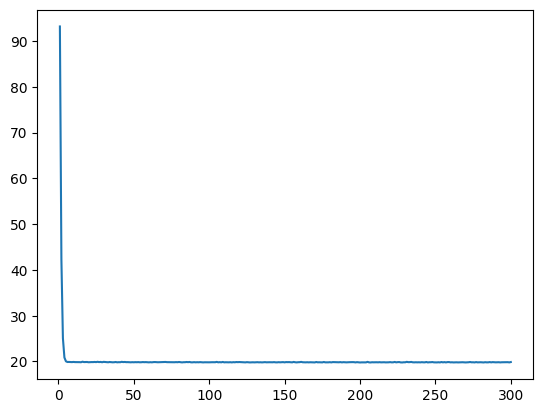

In [93]:
# 시각화 - 수치의 추이를 확인할 수 있는 그래프 (선그래프)
h.history.keys() # dict
h_loss = h.history['loss']
h_loss

# x축 반복횟수, y축 loss
plt.plot(range(1,301), h_loss)
plt.show()

In [84]:
# 모델마다 오차의 시작점이 다름 >> y=wx+b(선형함수) w,b의 세팅 초반에 랜덤하게 셋팅
# 여러번 반복하면서 오차가 최소가 되게하는 w,b를 찾는 것이 딥러닝 신경망 모델의 목적
# 300번 반복을 진행하지만, 10~20번째 사이에서 오차의 개선이 빠르게 진행됨을 알 수 있음(장점)
# 오차가 20 정도에서 수렴 > 1. 데이터를 더 좋은 특성을 많이 연결 2. 모델 설계 부분 조정, 하이퍼 파라미터 변경


In [94]:
# 기술통계
y.describe()

,G3
count,395.000000
mean,10.415190
std,4.581443
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


In [95]:
# 4. 모델 예측
# 모델.predict(문제)
pre = model.predict(X_test)
pre

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[10.73969 ],
       [11.620368],
       [10.73969 ],
       [10.005202],
       [10.005202],
       [10.73969 ],
       [10.73969 ],
       [11.264196],
       [10.005202],
       [11.620368],
       [11.264196],
       [10.73969 ],
       [11.264196],
       [10.73969 ],
       [10.73969 ],
       [10.005202],
       [10.005202],
       [10.73969 ],
       [11.620368],
       [10.73969 ],
       [11.264196],
       [10.73969 ],
       [10.73969 ],
       [10.73969 ],
       [10.73969 ],
       [10.73969 ],
       [11.264196],
       [10.73969 ],
       [10.73969 ],
       [11.264196],
       [10.73969 ],
       [11.264196],
       [10.73969 ],
       [10.73969 ],
       [10.73969 ],
       [11.620368],
       [10.73969 ],
       [10.73969 ],
       [10.005202],
       [11.620368],
       [10.73969 ],
       [10.73969 ],
       [10.005202],
       [10.005202],
       [10.73969 ],
       [11.264196],
       [10.73969 ],
       [10.005202],
       [10.73969 ],
       [10.73969 ],


In [97]:
# 모델 평가
# 모델 기본적인 평가 기능(도구) : 회귀 mse
# 모델.test score evaluate(o)
# 머신러닝 sklearn 모델 score 함수비교
# model.score(테스트문제, 테스트답)
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 22.8811  


23.33289337158203

#### 2번째 신경망 모델 자유롭게 쌓아보기
- 특성을 총 2개를 활용해서 모델 학습시켜보기
- studytime, freetime 자유시간 컬럼을 연결해서 수학성적 예측
- 인공신경망 모델을 통해 학습시켜보자!
- 모델 설계는 자유롭게
  - units 개수를 알아서 설정해보기
  - 중간층 개수를 늘려보기
  

In [102]:
# 1. 모델 설계 model2
model2 = Sequential()
model2.add(Dense(units=4, input_dim=2))
model2.add(Activation('sigmoid'))
model.add(Dense(units=1))
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 4)                   │               8 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 4)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 1)                   │               5 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │               2 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17 (72.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [103]:
# 2. 모델 학습/평가 방법
model2.compile(loss='mse', optimizer='sgd')


In [109]:
# 3. 학습, h 변수 담아서 시각화 연결
X=data[['studytime','freetime']]
X.ndim
X.shape
y=data['G3']
y.shape
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=4)
print('train set:', X_train.shape, y_train.shape)
print('test_set:', X_test.shape, y_test.shape)
h2=model2.fit(X_train, y_train, epochs=300)


train set: (276, 2) (276,)
test_set: (119, 2) (119,)
Epoch 1/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 119.5283  
Epoch 2/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 121.9345 
Epoch 3/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 111.7031 
Epoch 4/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 116.8951 
Epoch 5/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 112.3968  
Epoch 6/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 119.8075 
Epoch 7/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 116.5091  
Epoch 8/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 116.0067  
Epoch 9/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 114.6687 
Epoch 10/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 109.5768
Epoch 11/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 119.8005  
Epoch 12/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 113.7522  
Epoch 13/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 117.3605  
Epoch 14/300
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 113.2427

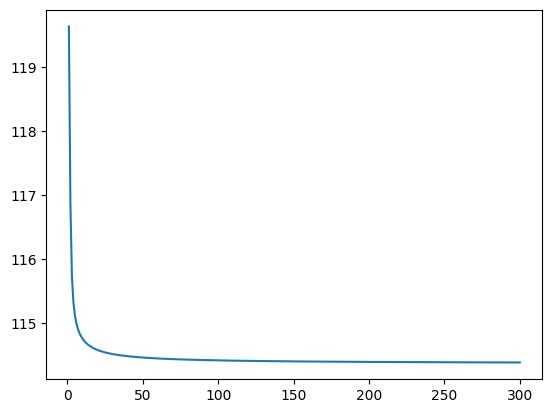

In [111]:
h2.history.keys()
h2_loss = h2.history['loss']
h2_loss

plt.plot(range(1,301), h2_loss)
plt.show()

In [112]:
y.describe()

,G3
count,395.000000
mean,10.415190
std,4.581443
min,0.000000
25%,8.000000
50%,11.000000
75%,14.000000
max,20.000000


In [113]:
# 4. 평가
pre2 = model2.predict(X_test)
pre2
# model., model 2 성능 비교하면서 특성이 1개 더 늘었을 때의 개선 효과 확인
# 파이썬 딥러닝 텐서플로 교재 50-61pg

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step


array([[0.9996727 , 0.9996439 , 0.9996687 , 0.9996623 ],
       [0.99997073, 0.99996495, 0.9999719 , 0.9999512 ],
       [0.99994147, 0.99993205, 0.9999394 , 0.99994224],
       [0.99890655, 0.99886566, 0.9988625 , 0.9991121 ],
       [0.99890655, 0.99886566, 0.9988625 , 0.9991121 ],
       [0.9996727 , 0.9996439 , 0.9996687 , 0.9996623 ],
       [0.989869  , 0.99030524, 0.9902013 , 0.9885675 ],
       [0.99945277, 0.9994146 , 0.99947333, 0.99924916],
       [0.99980426, 0.99978346, 0.9997916 , 0.9998481 ],
       [0.99983627, 0.9998163 , 0.9998467 , 0.99971443],
       [0.99990207, 0.9998883 , 0.99990356, 0.9998716 ],
       [0.9996727 , 0.9996439 , 0.9996687 , 0.9996623 ],
       [0.99945277, 0.9994146 , 0.99947333, 0.99924916],
       [0.99994147, 0.99993205, 0.9999394 , 0.99994224],
       [0.989869  , 0.99030524, 0.9902013 , 0.9885675 ],
       [0.99980426, 0.99978346, 0.9997916 , 0.9998481 ],
       [0.999965  , 0.9999587 , 0.99996185, 0.999974  ],
       [0.99994147, 0.99993205,

In [114]:
model2.evaluate(X_test, y_test2)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 95.7748  


98.50829315185547